<a href="https://colab.research.google.com/github/pabloclaero/Proyecto_1/blob/main/Proyecto_Pablo_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Parte 1

In [42]:
import pandas as pd
fn = '/content/sales_predictions.csv'
df = pd.read_csv(fn)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Parte 2

1. ¿Cuántas filas y columnas?

In [43]:
filas, columnas = df.shape
print(f"Esta tabla de prediccion de ventas tiene {filas} filas y {columnas} columnas.")

Esta tabla de prediccion de ventas tiene 8523 filas y 12 columnas.


2. ¿Cuáles son los tipos de datos en cada variable?

In [44]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3. ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [45]:
df.duplicated().sum()

0

4. Identifiquen los valores faltantes.

In [46]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

In [47]:
median_w = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_w, inplace=True)
print(median_w)

12.6


Rellene los datos faltantes en la colmna 'Item_weight'(peso del Item) con promedio debido a que no valia eliminar las filas porque son demasiados datos faltantes pero tampoco tantos como para eliminart la columna

In [48]:
most_common_size = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(most_common_size, inplace=True)
print(most_common_size)

Medium


Rellene con el el objeto o tamaño mas comun debido a que igual que 'Item_weight' supera el 2% como para eliminar las filas pero no supera el 45% como para eliminar la coumna no quise crear una nueva categoria ya que son muy especificas y ya pore definidas grande, mediano, y pequeño. Y tampoco es que la tienda se pueda auto identifique con otro tamaño como en el sexo de una persona.

6. Confirmen que no hay valores faltantes después de abordarlos.

In [49]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7. Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent)

In [50]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [51]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}, inplace=True)

In [52]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)

In [53]:
df_1 = pd.DataFrame(df)
resum = df_1.describe()
print(resum)

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count   8523.00000      8523.000000  8523.000000                8523.000000   
mean      12.81342         0.066132   140.992782                1997.831867   
std        4.22724         0.051598    62.275067                   8.371760   
min        4.55500         0.000000    31.290000                1985.000000   
25%        9.31000         0.026989    93.826500                1987.000000   
50%       12.60000         0.053931   143.012800                1999.000000   
75%       16.00000         0.094585   185.643700                2004.000000   
max       21.35000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


##Parte 3 y 4

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
plt.style.use('classic')
sns.set_palette('tab10')

In [63]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

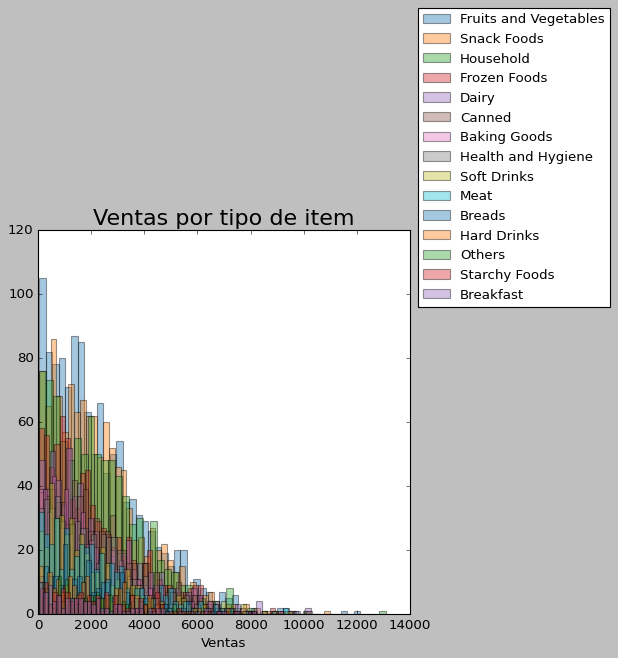

In [85]:
df_FV = df.loc[df['Item_Type'] == 'Fruits and Vegetables']
df_SF = df.loc[df['Item_Type'] == 'Snack Foods']
df_H = df.loc[df['Item_Type'] == 'Household']
df_FF = df.loc[df['Item_Type'] == 'Frozen Foods']
df_D = df.loc[df['Item_Type'] == 'Dairy']
df_C = df.loc[df['Item_Type'] == 'Canned']
df_BG = df.loc[df['Item_Type'] == 'Baking Goods']
df_HH = df.loc[df['Item_Type'] == 'Health and Hygiene']
df_SoF = df.loc[df['Item_Type'] == 'Soft Drinks']
df_M = df.loc[df['Item_Type'] == 'Meat']
df_B = df.loc[df['Item_Type'] == 'Breads']
df_HD = df.loc[df['Item_Type'] == 'Hard Drinks']
df_O = df.loc[df['Item_Type'] == 'Others']
df_StF = df.loc[df['Item_Type'] == 'Starchy Foods']
df_Br = df.loc[df['Item_Type'] == 'Breakfast']
plt.figure(figsize=(6,6))
plt.hist(df_FV['Item_Outlet_Sales'].values, alpha=0.4, label='Fruits and Vegetables', bins=50)
plt.hist(df_SF['Item_Outlet_Sales'].values, alpha=0.4, label='Snack Foods', bins=50)
plt.hist(df_H['Item_Outlet_Sales'].values, alpha=0.4, label='Household', bins=50)
plt.hist(df_FF['Item_Outlet_Sales'].values, alpha=0.4, label='Frozen Foods', bins=50)
plt.hist(df_D['Item_Outlet_Sales'].values, alpha=0.4, label='Dairy', bins=50)
plt.hist(df_C['Item_Outlet_Sales'].values, alpha=0.4, label='Canned', bins=50)
plt.hist(df_BG['Item_Outlet_Sales'].values, alpha=0.4, label='Baking Goods', bins=50)
plt.hist(df_HH['Item_Outlet_Sales'].values, alpha=0.4, label='Health and Hygiene', bins=50)
plt.hist(df_SoF['Item_Outlet_Sales'].values, alpha=0.4, label='Soft Drinks', bins=50)
plt.hist(df_M['Item_Outlet_Sales'].values, alpha=0.4, label='Meat', bins=50)
plt.hist(df_B['Item_Outlet_Sales'].values, alpha=0.4, label='Breads', bins=50)
plt.hist(df_HD['Item_Outlet_Sales'].values, alpha=0.4, label='Hard Drinks', bins=50)
plt.hist(df_O['Item_Outlet_Sales'].values, alpha=0.4, label='Others', bins=50)
plt.hist(df_StF['Item_Outlet_Sales'].values, alpha=0.4, label='Starchy Foods', bins=50)
plt.hist(df_Br['Item_Outlet_Sales'].values, alpha=0.4, label='Breakfast', bins=50)
plt.title('Ventas por tipo de item', fontsize=20)
plt.legend(loc=(1.02,0.80), fontsize=12)
plt.xlabel('Ventas', fontsize=12)
plt.show()

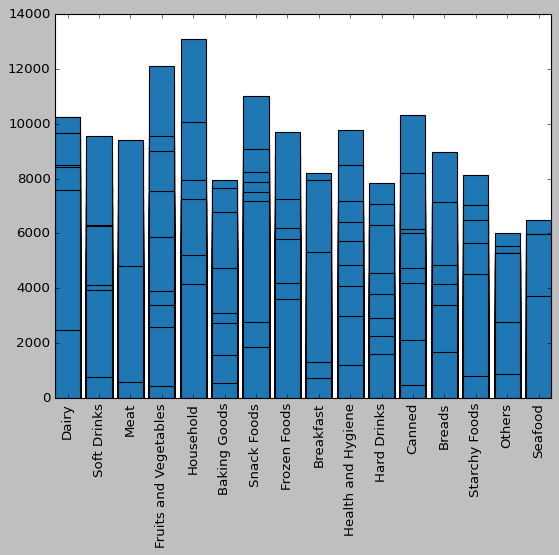

In [78]:
x = df['Item_Type']
y = df['Item_Outlet_Sales']
plt.bar(x, y)
plt.xticks(rotation=90)
plt.show()

In [57]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

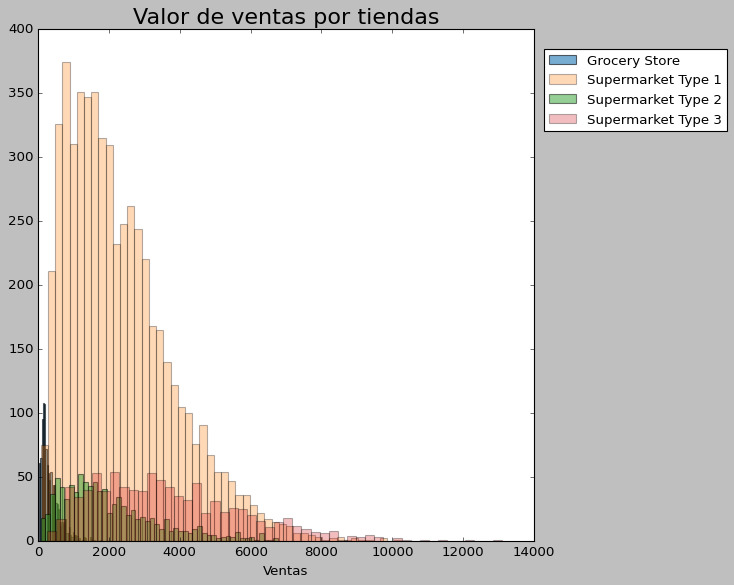

In [84]:
dfg = df.loc[df['Outlet_Type'] == 'Grocery Store']
dfs1 = df.loc[df['Outlet_Type'] == 'Supermarket Type1']
dfs2 = df.loc[df['Outlet_Type'] == 'Supermarket Type2']
dfs3 = df.loc[df['Outlet_Type'] == 'Supermarket Type3']
plt.figure(figsize=(8,8))
plt.hist(dfg['Item_Outlet_Sales'].values, alpha=0.6, label='Grocery Store', bins=50)
plt.hist(dfs1['Item_Outlet_Sales'].values, alpha=0.3, label='Supermarket Type 1', bins=50)
plt.hist(dfs2['Item_Outlet_Sales'].values, alpha=0.5, label='Supermarket Type 2', bins=50)
plt.hist(dfs3['Item_Outlet_Sales'].values, alpha=0.3, label='Supermarket Type 3', bins=50)
plt.title('Valor de ventas por tiendas', fontsize=20)
plt.legend(loc=(1.02,0.80), fontsize=12)
plt.xlabel('Ventas', fontsize=12)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


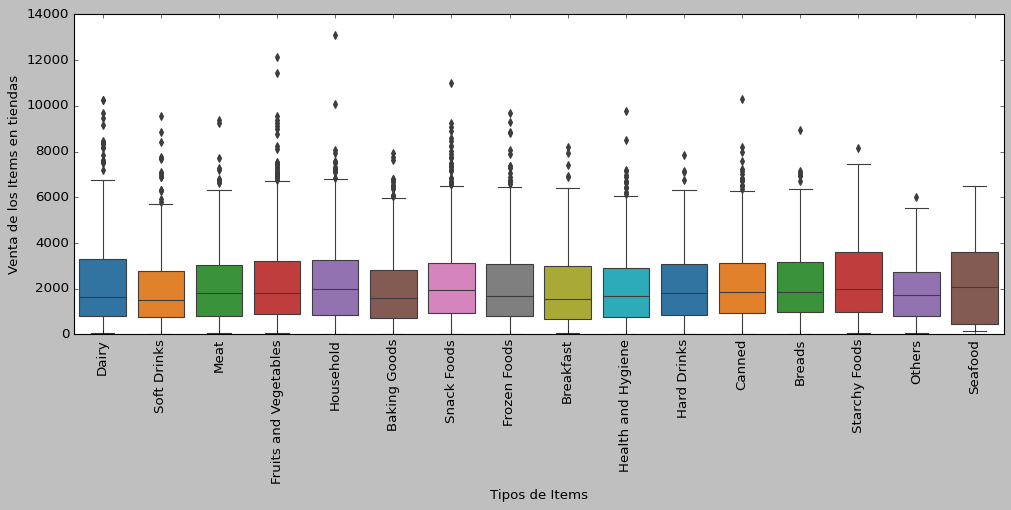

In [103]:
x1 = 'Item_Type'
y1 = 'Item_Outlet_Sales'
plt.figure(figsize=(15,5))
sns.boxplot(x1, y1, data=df, palette='tab10')
plt.xlabel('Tipos de Items')
plt.ylabel('Venta de los Items en tiendas')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


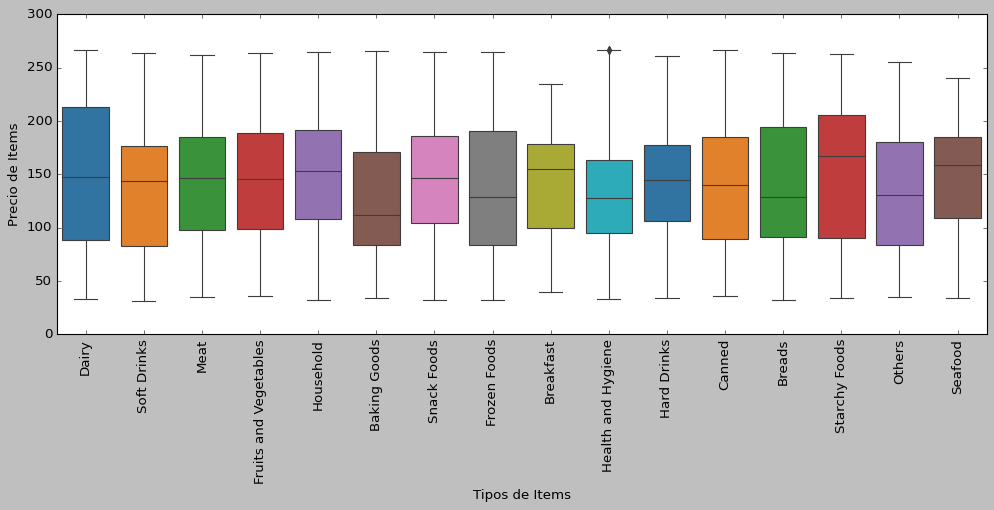

In [102]:
x1 = 'Item_Type'
y1 = 'Item_MRP'
plt.figure(figsize=(15,5))
sns.boxplot(x1, y1, data=df, palette='tab10')
plt.xlabel('Tipos de Items')
plt.ylabel('Precio de Items')
plt.xticks(rotation=90)
plt.show()

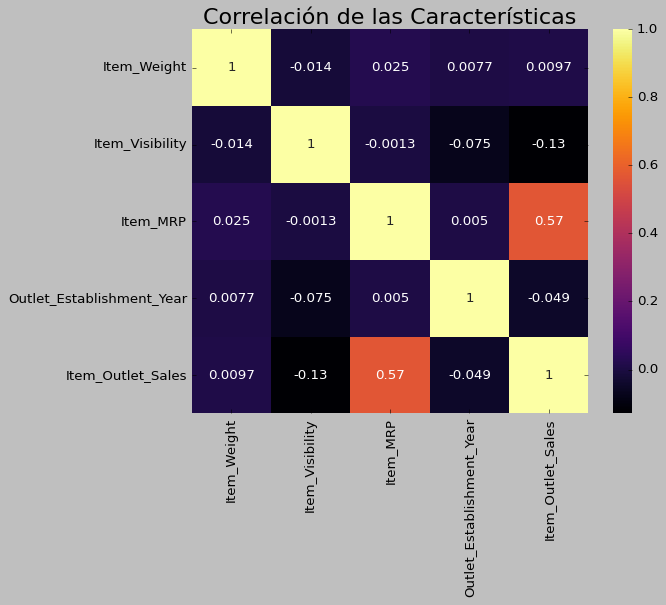

In [106]:
corr = df.corr()
sns.heatmap(corr, cmap = 'inferno', annot = True)
plt.title('Correlación de las Características', fontsize=20)
plt.show()